# 2.4 Example - Exporting Data out of the Experiment Class

    In this example methods of data export ar covered.  This writes out .csv files for ease of plotting in other software

    This example assumes that you have a pickled experiment by previoudly running:
        '2.0 Example - Experiment Class -  XAS Data Processing'
        '2.1 Example - Experiment Class -  Normalized XANES-EXAFS-FT'
        '2.2 Example - Experiment Class -  XAS-Process Stream Correlation'
        '2.3 Example - Experiment Class -  LCF of XANES Data'


### Steps:
    
    1. Import Modules
    2. Define Paths
    3. Open Saved Experiment using 'pickle'
    4. Exporting Data
        a. XAS-process parameter correlation table
        b. LCF fitting results
        c. Interpoated XAS spectra (XANES)
        

### Things to have ready when attemtping this example:

    1. Directory and filename for the 'pickled' experiment
    2. Directoty where to save results
    3. Filename for...
    4. Filename for... 
    5. filename for...

## Step 1. Import Modules

In [1]:
# File Handling
import os
import pickle

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

No conda env active, defaulting to base


## Step 2. Define Paths

#### Modify:
    1. pickle_dir - directory containing the pickled experiment
    2. pickpe_name - filename of the pickled experiment (must include extension '.pickle')
    3. output_dir - folder where results will be saved
    4. fname_correlation - file name for saving spectra-process correlation data
    5. fit_name - which LCF fit to be exported
    6. LCFReport_name - filename for saving the LCF fit report
    7.
    

In [2]:
# Directory Containing Experiment:
pickle_dir = os.path.join(pwd, 'sample results')

# Name of Experiment (must include extension '.pickle')
pickle_name = 'SnO2_TPR.pickle'

# Folder where results will be saved
output_dir = os.path.join(pwd, 'sample results')

# File name for saving spectra-process correlation data (extension can be left blank or .csv/.txt)
fname_correlation = 'SnO2_TPR_Process_Correlation'

# LCF fit to be saved and file name for the LFC Fit Report
fit_name = 'Fit 1' 
fname_LCFReport_name = 'First_Last_LCFReport'

# File name to save normalized and interpolated XAS spectra
fname_interpXAS = 'SnO2_TPR_NormXANES'

## Step 3. Open Saved Experiment using 'pickle'

    Pickle - A method to save the experimental class and reopen it elsewhere.

In [3]:
pickle_path = os.path.join(pickle_dir,pickle_name)
pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

## 4. Exporting Data

### 4a. XAS-process parameter correlation table

In [4]:
# Save Correlation Dataframe

my_exp.save_processparams(os.path.join(output_dir,fname_correlation))

Process Parameter Data Saved


### 4b. LCF fitting results

    Notes:
        1. if save_spectra = True each spectra will be saved alogn with its fit result and fractional components of each spectra in the basis set

In [5]:
my_exp.save_lcf_results(os.path.join(output_dir,fname_LCFReport_name), 
                        fit_name, save_spectra = True)

Successfully created subdirectory
LCF Data Saved


### 4c. Interpoated XAS spectra (XANES)

    It may be useful to export the spectra on a uniform grid with a specific energy range.  Common uses are for:
        1. plotting in non-python siftware
        2. taking a subset of the data for use in alternative analysis packages (UU PCA/MCR-ALS)

#### Sub steps for saving interpolated spectra:
    1. Determine the largest possible energy range and step size - this looks for the largest startign erngy value, smallest ending energy, and average step size to to determine over/under sampling.
    2. Perform the interpolation based upon start/stop/step size.
    3. Save the data to a user specified .csv file and path

#### 4c-1. Determinin largest interpolation range given XAS structure 

In [6]:
df = my_exp.check_Energy_Range(has_e0 = False, spectra_name = 'mu Sample', print_summary = True)

Energy Range and Energy-Step Summary for mu Sample
	Variation in starting energy points between spectra [eV]: 29004.24-29004.75
	Variation in ending energy points between spectra [eV]: 30175.00-30175.45
	Variation in step size of energy points between spectra [eV]: 0.24-0.24



#### 4c-2. Perform the interpolation based upon start/stop/step size

interpolation writes a dataframe to the exepriemnt.summary dictionary.

##### Modify:
    1. Start - energy to start the interpolation at
    2. Stop - energy to stop interpolation
    3. Step - energy step to interpolate on

In [7]:
# Set the energy range and step size to interpolate onto
start = 29050
stop = 29450
step = 0.25

In [8]:
# Interpolate Spectra
my_exp.interpolate_spectra(start, stop, step, x_axis = 'energy', sample = 'mu Sample')

#### Inspection tools to visualize the interpoalted data in dataframe and plot (plot uses pandas plotting)
    1. Interpoalted data in dataframe - experiment.__dict__['summary']['Interpolated energy']
    2. Plotting of interpolated data

In [9]:
# 1. Visualize dataframe of interpolated spectra

my_exp.__dict__['summary']['Interpolated energy']

,2021-06-14 16:33:52,2021-06-14 16:35:37,2021-06-14 16:37:23,2021-06-14 16:39:11,2021-06-14 16:40:57,2021-06-14 16:42:42,2021-06-14 16:44:27,2021-06-14 16:46:13,2021-06-14 16:47:59,2021-06-14 16:49:44,...,2021-06-14 17:44:29,2021-06-14 17:46:15,2021-06-14 17:48:01,2021-06-14 17:49:47,2021-06-14 17:51:32,2021-06-14 17:53:18,2021-06-14 17:55:04,2021-06-14 17:56:50,2021-06-14 17:58:36,2021-06-14 18:00:22
energy,,,,,,,,,,,,,,,,,,,,,
29050.00,0.002802,0.002520,0.003404,0.003983,0.001705,0.002277,0.003658,0.002988,0.001669,0.002286,...,0.002650,0.003557,0.004117,0.001395,0.002813,0.003484,0.002225,0.002947,0.002893,0.003251
29050.25,0.002547,0.004606,0.003727,0.004839,0.002183,0.003031,0.002133,0.002535,0.002145,0.003123,...,0.002234,0.003864,0.003918,0.001842,0.003632,0.003926,0.002411,0.003736,0.003758,0.003364
29050.50,0.003252,0.004093,0.003358,0.002803,0.002375,0.003571,0.001684,0.003401,0.002073,0.003894,...,0.002554,0.003732,0.003243,0.003056,0.004038,0.003232,0.002338,0.001954,0.004017,0.002702
29050.75,0.002973,0.003625,0.002649,0.002182,0.001941,0.003640,0.002720,0.004398,0.002022,0.003376,...,0.003197,0.005194,0.001988,0.001898,0.001799,0.002069,0.001912,0.003084,0.003078,0.002773
29051.00,0.002082,0.002705,0.002774,0.003704,0.001393,0.003932,0.002669,0.003186,0.002622,0.002021,...,0.004275,0.003412,0.002746,0.003502,0.001813,0.002738,0.002886,0.002948,0.001835,0.003517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449.00,1.014501,1.010329,1.014685,1.014388,1.011316,1.011501,1.013617,1.012464,1.012573,1.012505,...,1.003313,1.004093,1.002201,1.002625,1.003498,1.004037,1.004595,1.002874,1.005403,1.002216
29449.25,1.012325,1.012664,1.012772,1.013359,1.012873,1.012088,1.012873,1.014420,1.012259,1.012463,...,1.003570,1.004471,1.003155,1.002105,1.002944,1.004131,1.006542,1.003103,1.003793,1.004425
29449.50,1.014078,1.013722,1.011334,1.010467,1.012002,1.013318,1.013439,1.013552,1.012326,1.012213,...,1.003181,1.005457,1.002770,1.004473,1.003124,1.005165,1.005856,1.003795,1.001955,1.003655


<AxesSubplot:xlabel='energy'>

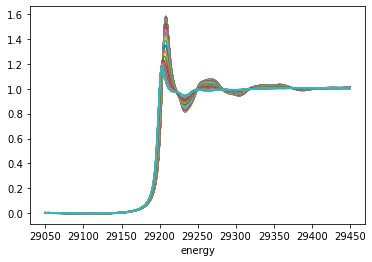

In [10]:
# 2. Visualzie interpolated spectra with plot

my_exp.__dict__['summary']['Interpolated energy'].plot(legend=False)

#### 4c-3. Save the dataframe to a csv file

In [13]:
# Save Normalized XANES:

my_exp.save_interpXAS(os.path.join(output_dir,fname_interpXAS))

Process Parameter Data Saved
